

# Project: No_show appointments and the correlation with age and welfare status

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I investigate no_show_appointments in this data set in the country Brazil. I decided to analyze the correlation between the missed appointments and the patient's age or welfare status. This is to determine whether elderly people(who are more likely to need healthcare assistance) attend appointments more reliably than younger individuals. This is also to determine whether people on welfare are less likely to attend appointments as a result of work schedules and unreliable transportation.

In [139]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [140]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshows.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,"29,872,500,000,000.00",5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,"558,998,000,000,000.00",5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,"4,262,960,000,000.00",5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,"867,951,000,000.00",5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,"8,841,190,000,000.00",5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [141]:
df.isnull().sum()
pd.options.display.float_format = '{:9,.2f}'.format

> There are no null values in this data set, so we do not have to drop any rows. 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

>To clean the data I made all columns lowercase and renamed them to more readable/logical names, adding underscores where there was once spaces. Then in the location column, I made the responses lowercase and replaced spaces with underscores for consistency. I made the no_show responses lowercase as well and checked the results. 

In [143]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.columns = map(str.lower, df.columns)
df.columns = ['patient_id', 'appt_id', 'gender', 'scheduled_day', 'appt_day', 'age', 'location', 'welfare', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df['location'] = df['location'].str.lower().str.replace('\s+', '_')
df['gender'] = df['gender'].str.lower()
df['no_show'] = df['no_show'].str.lower()
df.head()

,patient_id,appt_id,gender,scheduled_day,appt_day,age,location,welfare,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,"29,872,500,000,000.00",5642903,f,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,jardim_da_penha,0,1,0,0,0,0,no
1,"558,998,000,000,000.00",5642503,m,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,jardim_da_penha,0,0,0,0,0,0,no
2,"4,262,960,000,000.00",5642549,f,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,mata_da_praia,0,0,0,0,0,0,no
3,"867,951,000,000.00",5642828,f,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,pontal_de_camburi,0,0,0,0,0,0,no
4,"8,841,190,000,000.00",5642494,f,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,jardim_da_penha,0,1,1,0,0,0,no


<a id='eda'></a>
## Exploratory Data Analysis

> Let's begin with univariate data analysis before proceding to the bivariate data analysis required by our research questions

> How many appointments were attended and how many were no shows? 

In [144]:
df['no_show'].value_counts()

no     88208
yes    22319
Name: no_show, dtype: int64

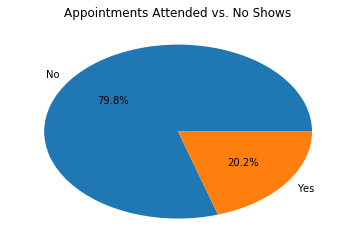

In [145]:
z = df['no_show'].value_counts(normalize=True)
plt.pie(z, labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Appointments Attended vs. No Shows')
plt.show()

### Research Question 1: Are older individuals less likely to miss their appointments?

>To answer this question I first made a new column "age range" and placed patients into categories based of their age. I classified individuals under 18 as children, individuals over 18 and under 55 as adults, and individuals over 55 as elderly. This was the most logical division after looking at the division of the data with the describe() function. 

>I then created a conditional scenario that determined counts for whether each age category attended or missed appointments. 

>For more comprehensive analysis, I created a pie chart with readable labels to assist with visualization and drew conclusions.

In [146]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

def age_range(df):
    if df["age"] <= 18:
        return "child"
    elif df["age"] <= 55:
        return "adult"
    else:
        return "elderly"

df['age_range'] = df.apply(age_range, axis=1)

def age_appt(df): 
    if (df['age_range'] == 'child' and df['no_show'] == 'no'): 
        return 'child_yes'
    elif (df['age_range'] == 'child' and df['no_show'] == 'yes'): 
        return 'child_no'
    elif (df['age_range'] == 'adult' and df['no_show'] == 'no'): 
        return 'adult_yes'
    elif (df['age_range'] == 'adult' and df['no_show'] == 'yes'): 
        return 'adult_no'
    elif (df['age_range'] == 'elderly' and df['no_show'] == 'no'): 
        return 'elderly_yes'
    else: 
        return 'elderly_no'
    
df.loc[:,'age_appt'] = df.apply(age_appt, axis=1)
    
df['age_appt'].value_counts(normalize=True)

adult_yes          0.38
elderly_yes        0.21
child_yes          0.20
adult_no           0.11
child_no           0.06
elderly_no         0.04
Name: age_appt, dtype: float64

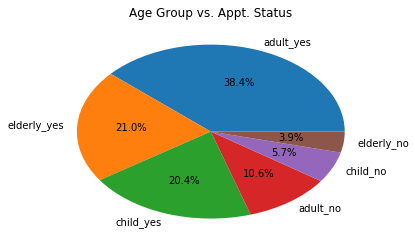

In [147]:
x = df['age_appt'].value_counts(normalize=True)
plt.pie(x, labels=['adult_yes', 'elderly_yes', 'child_yes', 'adult_no', 'child_no', 'elderly_no'], autopct='%1.1f%%')
plt.title('Age Group vs. Appt. Status')
plt.show()

([<matplotlib.axis.XTick at 0x23af5a85128>,
 <a list of 6 Text xticklabel objects>)

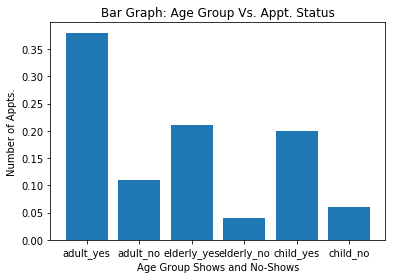

In [148]:
dictionary = plt.figure()

D = {'adult_yes': .38, 'adult_no': .11, 'elderly_yes': .21, 'elderly_no': .04, 'child_yes': .20, 'child_no': .06}
plt.bar(range(len(D)), D.values(), align='center')
plt.title('Bar Graph: Age Group Vs. Appt. Status')
plt.xlabel('Age Group Shows and No-Shows')
plt.ylabel('Number of Appts.')
plt.xticks(range(len(D)), D.keys())

In [149]:
df['age_appt'].value_counts(normalize=False)

adult_yes      42487
elderly_yes    23201
child_yes      22520
adult_no       11669
child_no        6347
elderly_no      4303
Name: age_appt, dtype: int64

([<matplotlib.axis.XTick at 0x23af7f90588>,
 <a list of 2 Text xticklabel objects>)

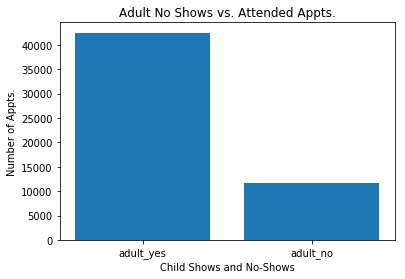

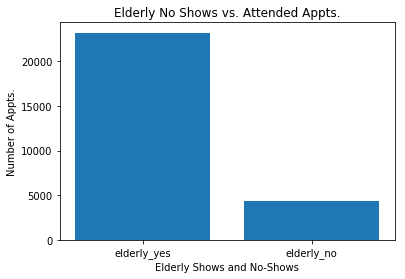

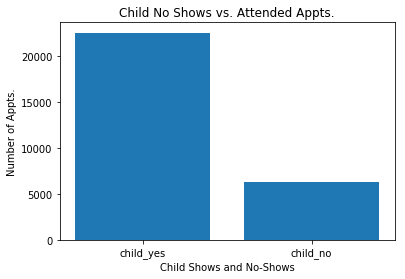

In [150]:
dictionary = plt.figure()

C = {'adult_yes': 42487, 'adult_no': 11669}
plt.bar(range(len(C)), C.values(), align='center')
plt.title('Adult No Shows vs. Attended Appts.')
plt.xlabel('Child Shows and No-Shows')
plt.ylabel('Number of Appts.')
plt.xticks(range(len(C)), C.keys())

dictionary = plt.figure()

B = {'elderly_yes': 23201, 'elderly_no': 4303}
plt.bar(range(len(B)), B.values(), align='center')
plt.title('Elderly No Shows vs. Attended Appts.')
plt.xlabel('Elderly Shows and No-Shows')
plt.ylabel('Number of Appts.')
plt.xticks(range(len(B)), B.keys())

dictionary = plt.figure()

A = {'child_yes': 22520, 'child_no': 6347}
plt.bar(range(len(A)), A.values(), align='center')
plt.title('Child No Shows vs. Attended Appts.')
plt.xlabel('Child Shows and No-Shows')
plt.ylabel('Number of Appts.')
plt.xticks(range(len(A)), A.keys())

>Results show: Adults miss 22% of their total appointments, while elderly miss roughly 15%, children miss the most with 23% of total appointments as no shows. 
This means that children miss the most appointments. This could be due to a variety of factors, but is useful in determining which population to target in emphasizing the importance of showing up to appointments. 

### Research Question 2: Does income level impact missed appointment count?

>To answer this question I defined a conditional that determined whether a patient was on welfare as well as whether they missed or attended their appointments. I counted the values and made a pie chart for visualization assistance. I then drew conclusions. 

In [151]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

def welfare_appt(df): 
    if (df['welfare'] == 1 and df['no_show'] == 'yes'): 
        return 'welfare_noshow'
    elif (df['welfare'] == 1 and df['no_show'] == 'no'): 
        return 'welfare_show'
    elif (df['welfare'] == 0 and df['no_show'] == 'yes'): 
        return 'nowelfare_noshow'
    else: 
        return 'nowelfare_show'
    
df['welfare_appt'] = df.apply(welfare_appt, axis=1)
    
df['welfare_appt'].value_counts(normalize=True)

nowelfare_show          0.72
nowelfare_noshow        0.18
welfare_show            0.07
welfare_noshow          0.02
Name: welfare_appt, dtype: float64

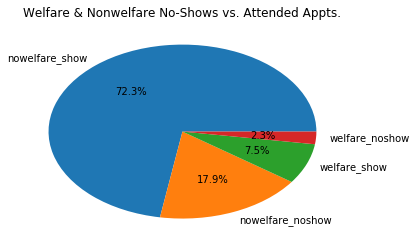

In [152]:
x = df['welfare_appt'].value_counts(normalize=True)
plt.pie(x, labels=['nowelfare_show', 'nowelfare_noshow', 'welfare_show', 'welfare_noshow'], autopct='%1.1f%%')
plt.title('Welfare & Nonwelfare No-Shows vs. Attended Appts.')
plt.show()

In [153]:
df['welfare_appt'].value_counts(normalize=False)

nowelfare_show      79925
nowelfare_noshow    19741
welfare_show         8283
welfare_noshow       2578
Name: welfare_appt, dtype: int64

([<matplotlib.axis.XTick at 0x23af7e2c860>,
 <a list of 2 Text xticklabel objects>)

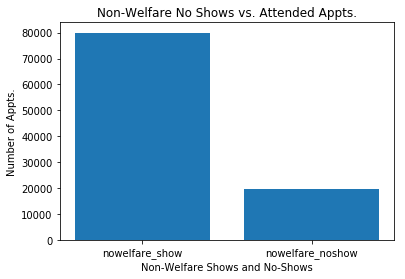

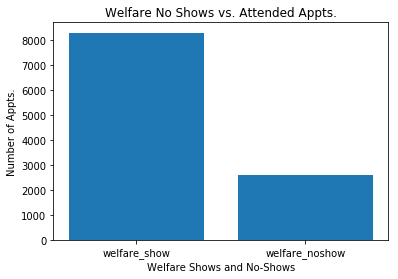

In [154]:
dictionary = plt.figure()

E = {'nowelfare_show': 79925, 'nowelfare_noshow': 19741}
plt.bar(range(len(E)), E.values(), align='center')
plt.title('Non-Welfare No Shows vs. Attended Appts.')
plt.xlabel('Non-Welfare Shows and No-Shows')
plt.ylabel('Number of Appts.')
plt.xticks(range(len(E)), E.keys())

dictionary = plt.figure()

F = {'welfare_show': 8283, 'welfare_noshow': 2578}
plt.bar(range(len(F)), F.values(), align='center')
plt.title('Welfare No Shows vs. Attended Appts.')
plt.xlabel('Welfare Shows and No-Shows')
plt.ylabel('Number of Appts.')
plt.xticks(range(len(F)), F.keys())

> Results show: individuals on welfare are more likely to miss the appointments they have than individuals who are not on welfare. Individuals who are not on welfare miss 19.8% of the appointments they have, while individuals on welfare miss 22.8% of the appointments they have.

In [155]:
df_2 = pd.read_csv('noshows.csv', usecols=[7, 12])
df_2.corr()

,Scholarship,SMS_received
Scholarship,1.00,0.00
SMS_received,0.00,1.00


> Above you will note the correlation matrix and can see the relationship between individuals on welfare and thelikelihood those individuals received an sms reminder. This was an attempt to explain the skew in results showing individuals on welfare are more likely to become no-shows at appointments. However, results show no correlation between whether individuals on welfare and whether an sms message was received. 

> Below is another attempt to explain results. showing whether individuals on welfare are less likely to be handicapped. From the results, we can see that individuals on welfare are negatively correlated with being handicapped. Though unexpected, this can help us understand the welfare no-shows. People who are not handicapped are less likely to necessitate a healthcare appointment (it is more likely to be a checkup or nonemergent appointment). Therefore they are less motivated to attend and more likely to become a noshow.  

In [156]:
df_3 = pd.read_csv('noshows.csv', usecols=[7, 11])
df_3.corr()

,Scholarship,Handcap
Scholarship,1.00,-0.01
Handcap,-0.01,1.00


<a id='conclusions'></a>
## Conclusions

> In the the first question I found that the individuals more likely to miss appointments are children 18 and under. This is likely because they must rely on their parents to take them to their appointments on time and are thus more likely to have scheduling conflicts. 
If the clinic targets parents and children in emphasizing the importance of attending appointments, this could help mitigate these results.

>In the second question, I found that individuals on welfare are more likely to miss their appointments than individuals who are not on welfare. However, this was not by a great margin. Though individuals who make less money are more likely to have work-conflicts, they make their appointments nearly as much. 

## LIMITATIONS

>1. More results for certain age groups than others
>2. More results for nonwelfare groups than welfare groups 
>3. Correlation is not causation: for cause of welfare no shows
>4. Results may be different when segregated by location as well 

## Submitting your Project 


In [157]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295